# Exploration 11

모듈 생성

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

## STEP 1: 시계열 데이터 준비

- 칼럼 종류: Date, Open, High, Low, Close, Adj Close, Volume
- 날짜별로 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)이 저장되어 있는 것을 확인할 수 있습니다.
- 우리는 종가(Close)만 사용하겠습니다. (주식 시장은 정해진 시간 동안만 거래가 가능합니다. 종가란 하루의 장이 마감하였을 때의 가격입니다.)

In [2]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-18,47950.0,49100.0,47600.0,48800.0,46788.835938,20481981
1,2020-05-19,50100.0,50500.0,49700.0,50300.0,48227.015625,25168295
2,2020-05-20,50000.0,50200.0,49800.0,50000.0,47939.382813,14896899
3,2020-05-21,50300.0,50400.0,49850.0,49950.0,47891.437500,14949266
4,2020-05-22,49600.0,49800.0,48600.0,48750.0,46740.894531,19706284


In [3]:
# Time Series 생성
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

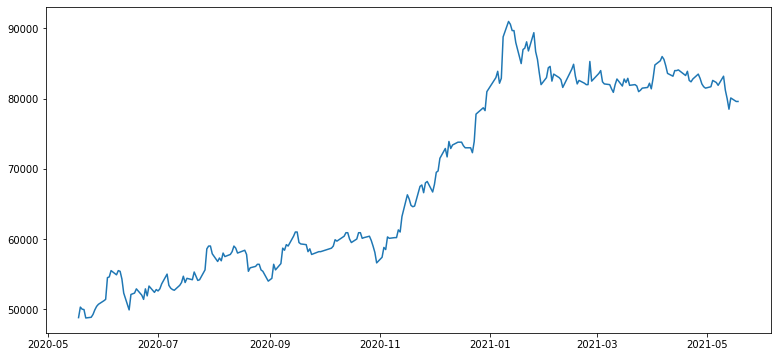

In [4]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

plt.plot(ts)

## STEP 2: 각종 전처리 수행

- 결측치 처리
- 로그 변환

In [5]:
# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

In [6]:
# 로그 변환
ts_log = np.log(ts)

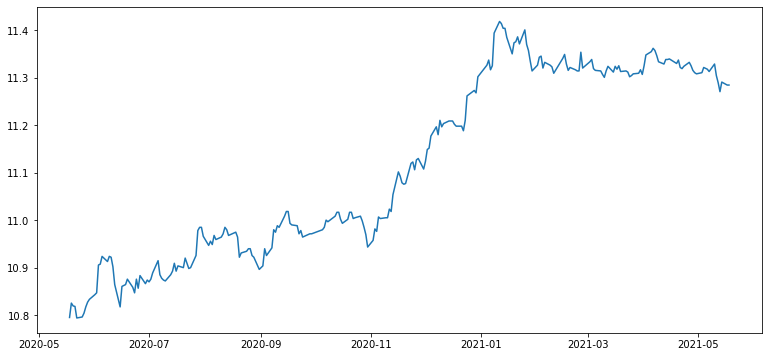

In [7]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts_log)

## STEP 3: 시계열 안정성 분석


- 정성적 그래프 분석
- 정량적 Augmented Dicky-Fuller Test
- 시계열 분해(Time Series Decomposition)
- Residual 안정성 확인

In [8]:
# 정성적 그래프 분석 함수
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label='Rolling Std') 제거
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

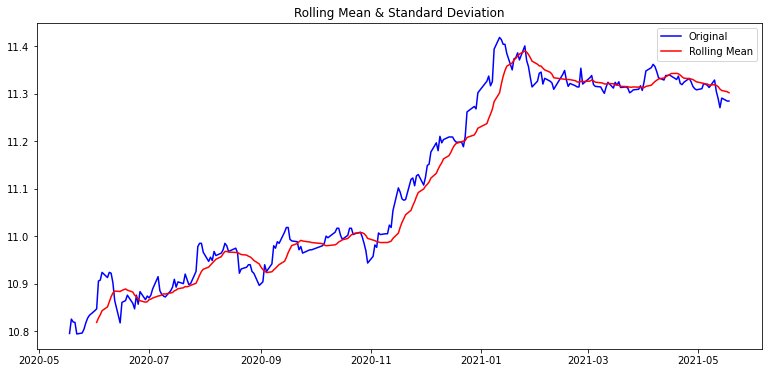

In [9]:
plot_rolling_statistics(ts_log, window=12)

In [10]:
# 정량적 Augmented Dicky-Fuller Test 함수

from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [11]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


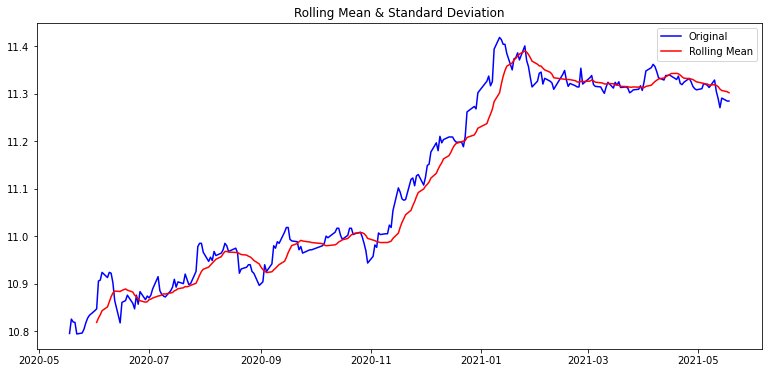

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


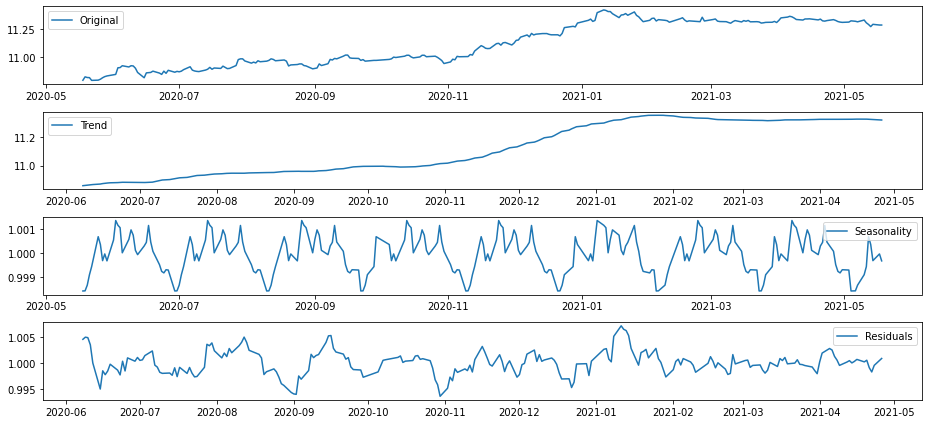

In [12]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

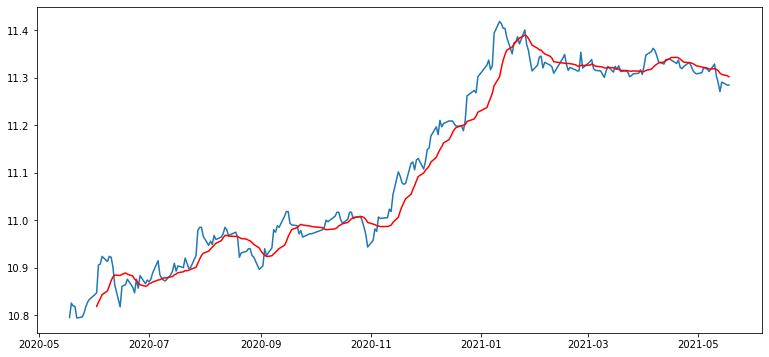

In [13]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [14]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Date
2020-05-18         NaN
2020-05-19         NaN
2020-05-20         NaN
2020-05-21         NaN
2020-05-22         NaN
2020-05-25         NaN
2020-05-26         NaN
2020-05-27         NaN
2020-05-28         NaN
2020-05-29         NaN
2020-06-01         NaN
2020-06-02    0.028599
2020-06-03    0.077956
2020-06-04    0.072953
2020-06-05    0.080606
Name: Close, dtype: float64

In [15]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Date
2020-06-02    0.028599
2020-06-03    0.077956
2020-06-04    0.072953
2020-06-05    0.080606
2020-06-08    0.061862
2020-06-09    0.061925
2020-06-10    0.049636
2020-06-11    0.021446
2020-06-12   -0.019996
2020-06-15   -0.066141
2020-06-16   -0.025267
2020-06-17   -0.024961
2020-06-18   -0.024494
2020-06-19   -0.010603
2020-06-22   -0.023697
Name: Close, dtype: float64

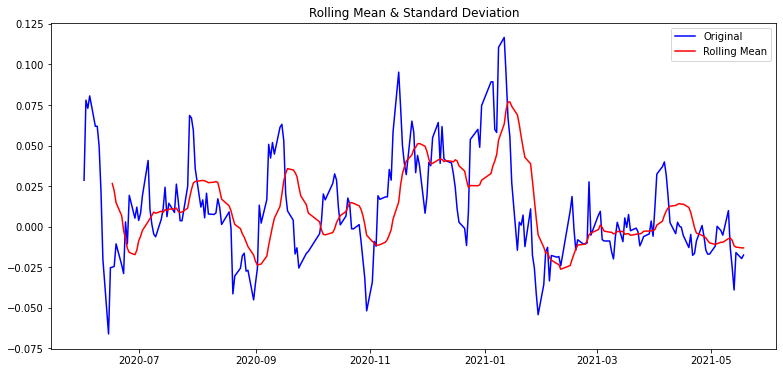

In [16]:
plot_rolling_statistics(ts_log_moving_avg)

In [17]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -4.163469
p-value                          0.000759
#Lags Used                       0.000000
Number of Observations Used    238.000000
Critical Value (1%)             -3.458128
Critical Value (5%)             -2.873762
Critical Value (10%)            -2.573283
dtype: float64


p-value가 0.590140 에서, 0.000759로 현저히 줄었다.

In [18]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)

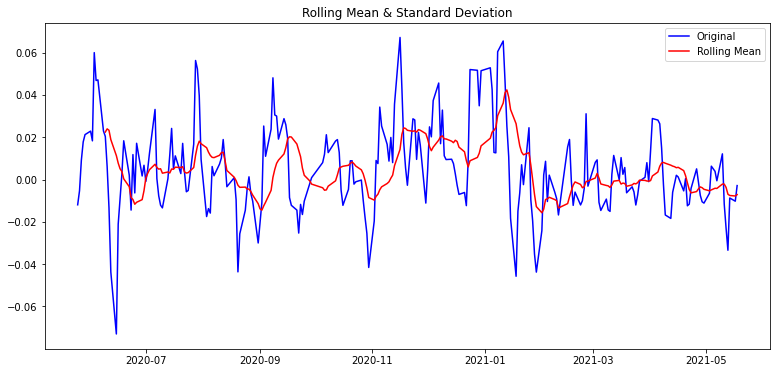

In [19]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [20]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -4.800754
p-value                          0.000054
#Lags Used                       5.000000
Number of Observations Used    239.000000
Critical Value (1%)             -3.458011
Critical Value (5%)             -2.873710
Critical Value (10%)            -2.573256
dtype: float64


p-value가 0.000759에서, 0.000054로 훨씬더 줄었다.

#### 계절성 상쇄

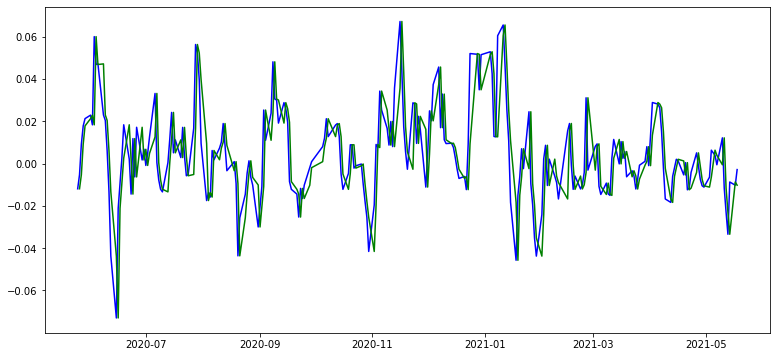

In [21]:
ts_log_moving_avg_shift_6 = ts_log_moving_avg_6.shift()

plt.plot(ts_log_moving_avg_6, color='blue')
plt.plot(ts_log_moving_avg_shift_6, color='green')

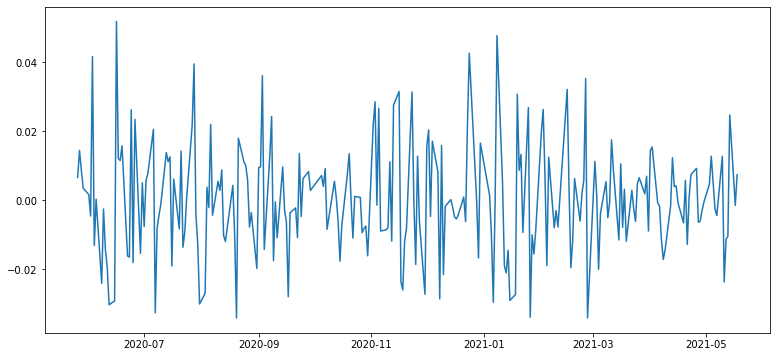

In [22]:
ts_log_moving_avg_diff_6 = ts_log_moving_avg_6 - ts_log_moving_avg_shift_6
ts_log_moving_avg_diff_6.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff_6)

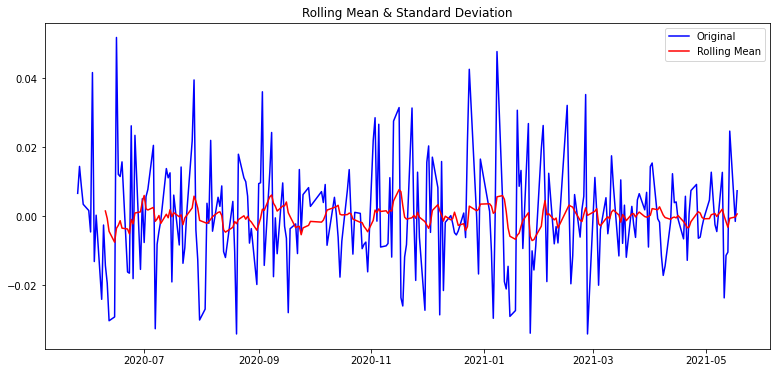

In [23]:
# 정성적으로 안전성(stationary) 여부 파악
plot_rolling_statistics(ts_log_moving_avg_diff_6)

In [24]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff_6)

Results of Dickey-Fuller Test:
Test Statistic                -1.074520e+01
p-value                        2.753116e-19
#Lags Used                     4.000000e+00
Number of Observations Used    2.390000e+02
Critical Value (1%)           -3.458011e+00
Critical Value (5%)           -2.873710e+00
Critical Value (10%)          -2.573256e+00
dtype: float64


p-value가 0.000054 에서, 2.753116e-19 수준으로 매우 떨어졌다.

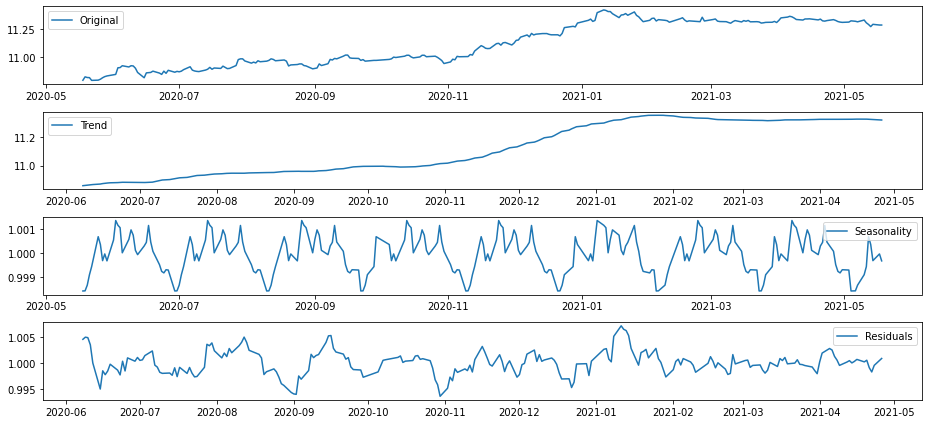

In [25]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

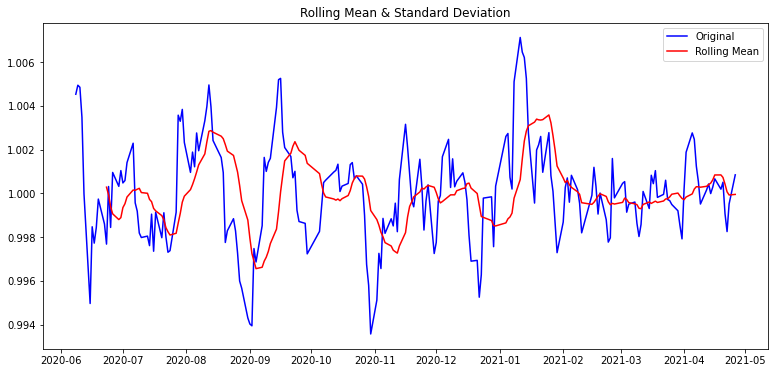

In [26]:
# Residual 안정성 확인
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [27]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


## STEP 4: 학습, 테스트 데이터셋 생성

학습, 테스트 데이터셋 분리

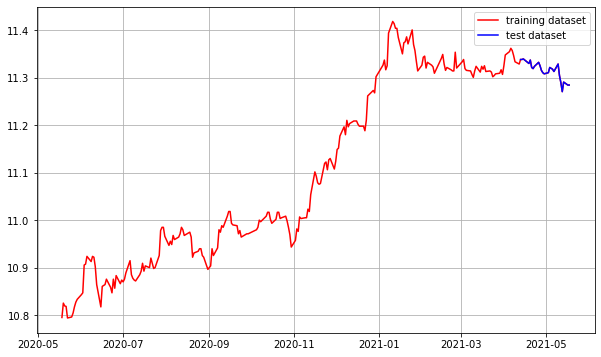

In [28]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [29]:
# 데이터셋 형태 확인
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2020-05-18    10.795486
2020-05-19    10.825760
Name: Close, dtype: float64
(225,)
(25,)


## STEP 5: 적정 ARIMA 모수 찾기

- ACF, PACF 그려보기 -> p,q 구하기
- 차분 안정성 확인 -> d 구하기

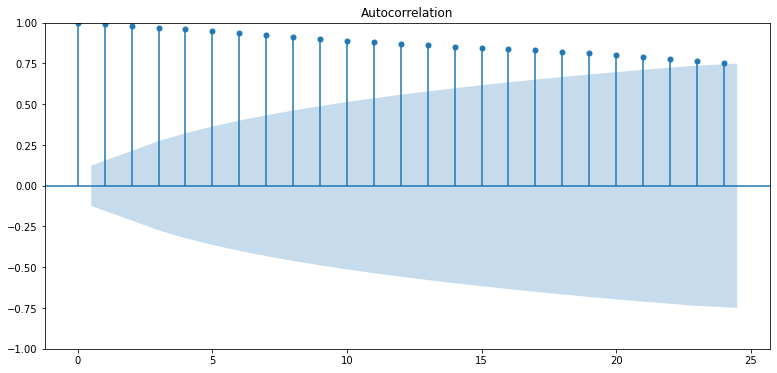

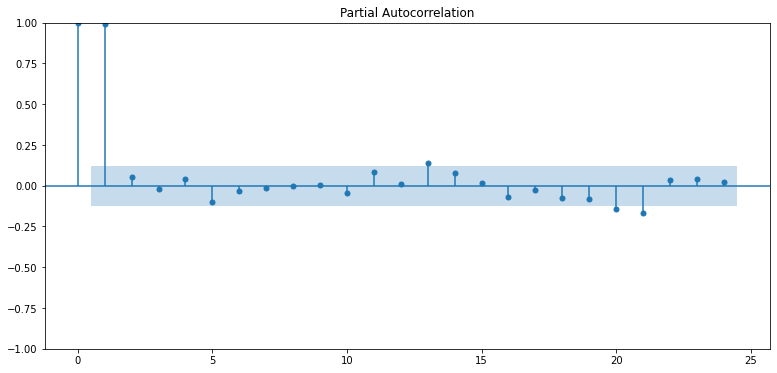

In [30]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


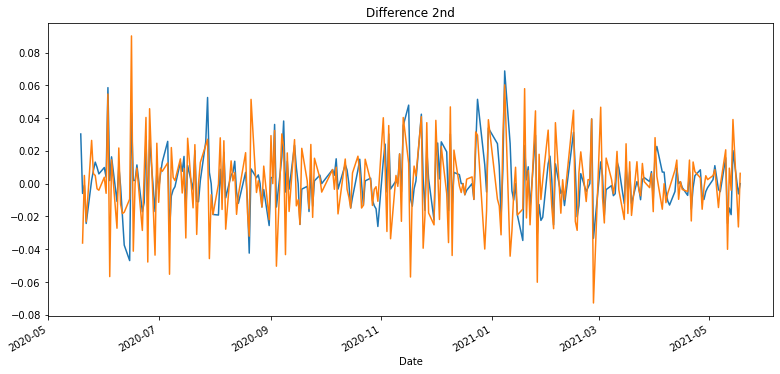

In [31]:
# 차분 안정성 확인 -> d 구하기

# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

파랑 - 1차 / 주황 - 2차

## STEP 6: ARIMA 모델 훈련과 테스트

- ARIMA 모델 빌드와 훈련
- 모델 테스트 및 플로팅
- 최종 예측 모델 정확도 측정(MAPE)

In [32]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# Build and Train  Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 583.361
Date:                Thu, 17 Feb 2022   AIC                          -1156.722
Time:                        14:17:10   BIC                          -1139.642
Sample:                             0   HQIC                         -1149.828
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0896      0.129     86.277      0.000      10.838      11.342
ar.L1          0.7739      1.821      0.425      0.671      -2.796       4.344
ar.L2          0.2191      1.811      0.121      0.9

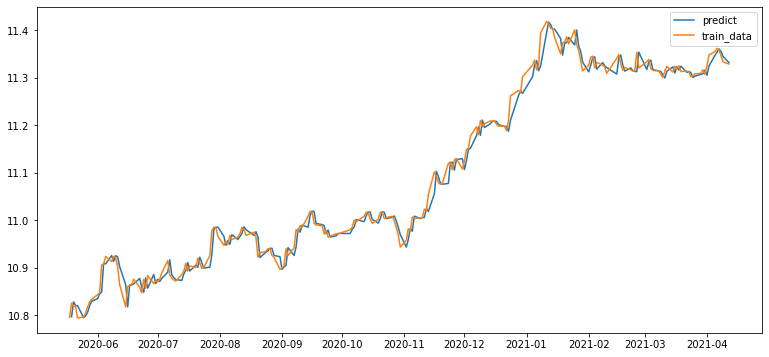

In [33]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

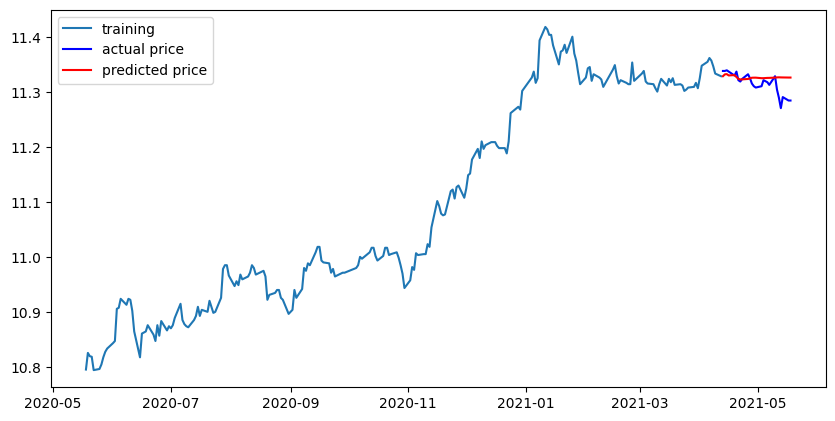

In [35]:
# Forecast : 결과가 fc에 담깁니다. 
model = ARIMA(train_data, order=(14, 1, 0))  # p값을 14으로 테스트
fitted_m = model.fit() 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  3003894.0665715677
MAE:  1233.5105152308563
RMSE:  1733.1745632138638
MAPE: 1.53%


# STEP 7: 다른 주식 종목 예측해 보기

실패......................

# 회고
## 이번 프로젝트에서 어려웠던 점
- 이번프로젝트는 내용, 코드, 통계학 지식, 도메인지식(주식) 모두 놓치고 말았습니다. 데이터 사이언스에서 가장 필요한 요소들 중 어느 하나 잡지 못하였습니다.. 집중도가 떨어졌던 것인지는 모르겠지만... 내용 단 한 개도 소화 해 내지못하였습니다.. 때문에 모든것이 어려웠다고 말씀 드릴 수 있을 것 같습니다...
- 앞으로 시계열 데이터에 대해 해커톤에서도 그렇고 더 한다고 하는데, 정말 걱정입니다.. 이유 불문하고, 이번 노드를 포기하고, 틈틈히 이번 노드에서 알려 준 통계적 지식도 차분히 쌓고, 코드하나 하나에 대해 틈틈히 공부해야겠습니다.

## 프로젝트를 진행하며 알아낸 점 혹은 아직 모호한 점
- 이번프로젝트에서 처음으로 시계열 이라는 개념을 알게되었습니다.
- 다만, 가장 처음부분인 DataFarme type에서, Serise로 바꾸기 위해 index에 Date을 넣으면 그것이 시계열 데이터 준비가 됐다고 하는데, 아직 그 연관성이 모호합니다.

- 시계열 안정성을 분석하기 위해 정성적, 정량적 데이터를 분석하고, 시계열 분해, 그리고 Residual 이라는 것을 한다는 점을 알게되었습니다.
- 다만, 각각의 수치가 뜻하는 바 들에 대한 내용과, 그래프나 숫자를 보아도 어떤부분을 어떤식으로 개선하기위해 어떤 방법을 쓴 것인지, 즉, 정성적(그래프) 정량적(숫자) 시계열분해(Original, trend, seasonal, residual) 로 나눈 것만 알겠지, 각각이 무엇을 의미하는 지가 모호합니다. (다 모른다는 뜻..)

- 위의 기본적인 것들을 놓치게 되니, 뒤의 학습하게 되는 상황에서도, 어떻게 어떤 방식으로 학습을 하게 된것인지 전혀 알 수 없었습니다.

- 때문에 마지막에 나온 MAPE: 1.53%라는 수치가 의미하는 바 역시도 알 수 없었습니다.

## 루브릭 평가 지표를 맞추기 위해 시도한 것들.
- 우선 나중에 제가 다시 볼 때를 위하여, 실습때 제공해 준 데이터만이라도 이용해서 완성하고자 하였습니다. 때문에, 내용은 잘 모르겠지만, STEP에서 가이드 해 준 것과, 그리고 실습 때 배운 내용을 바탕으로 일단 모르더라도 순서만이라도 완성시키는 것을 목표로 두고 하였습니다.

- 때문에, adfuller메소드를 사용할 수 있었고, 플로팅 역시 우선 가이드대로 하였습니다.
- p, q를 위한 ACF, PACF사용에 대해서는, 우선 모수를 고르긴 하였으나, 역시 가이드대로 하였기에, 모수선택 근거를 체계적으로 제시하지 못하였습니다.
- 마지막으로 MAPE 15% 미만의 정확도는, 우선 실습에서 주어주신 데이터에 대해서는 어쩌다보니 달성하게 되었습니다. 다만, 다른 데이터는 아직 노드를 이해하지 못하였기에 불러올 수 없었습니다. 향후 이번 실습 노트를 계속하여 확인해보며 내용이 숙지가 되었을 때, 다시 돌아와서 완성을 시킬 것 입니다.

## 루브릭 평가 관련 지표를 달성하지 못했을 때, 이유에 관한 추정.
- 물론입니다. 모든것을 이루지 못하였습니다.
- 실습 방향에 대해서도 잃었고, 이번 노드를 분석하기 위한 코드 및 도메인지식, 통계학적 지식 모두 없었습니다.
- 그 때문에 지표에서 요구헀던 모수선택 근거를 체계적으로 제시하지 못하였으며, adfuller메소드, 플로팅을 하였으나, 적절한 여부에대해 자신있게 답변 드리지 못합니다.
- 마지막으로, 다른 실습 노드를 시도조차 못해본 것이 물론 감점 요인입니다.

## 자기다짐
- 다르 노드들이 많이 밀려 늦게 출발했다는 핑계, 조금 지쳐있다는 핑계, 내용이 어려웠다는 핑계, 그 화살 모두를 제 자신에서 쏘고 싶습니다. 읽으면 읽을수록, 이번 Exploration을 완성시키려고 하나씩 건들면 건들수록 제 자신에게 한심함을 안겨주고, 절망감만 주는 단원이 아니었나 싶습니다. 하지만 역시 AIFFEL에서 제가 최초에 다짐했던 것 처럼, 그리고 경험 한 것 처럼, 이 모든 순간, 모든 실습들이 제게 매우 큰 거름이고 경험이라 생각합니다. 성공하면 하나를 배우고, 실패하면 모든걸 배운다 들었습니다. 이 상황에서 쓰는게 아니라는 것은 잘 압니다. 만약 성공하였더라면 지금처럼 성공시키지 못했을 때 보다도 더 많은것을 알아갔겠지요, 하지만 제가 이렇게 회고록을 쓰듯, 제가 무엇을 얼마나 몰랐는지를 회고하기에, 다시 다음번에 시계열 관련하여 좀 더 공부하고, 이번에 공부하며 찾아온 수많은 링크들과 필기들을 되 짚어보며, 다시 이 회고를 보았을 때, 제 자신이 얼마나 성장했는지에 대한 큰 지표가 될 것임을 알기에, 제 자신에게 이렇게 편지를 쓰듯 회고를 남겨 봅니다.
- 이번주는 자신감을 많이 잃은 주가 맞지만, 그만큼 큰 깨달음을 얻은 주 이기도 하지 않나 스스로를 다독여 봅니다. 포기하지 않고, 어쨋든 스스로 세운 목표, 즉 이 노드를 오류없이 일단 구현을 해 놓았다는 목표를 달성하고, 아예 제출 조차 시도를 못할 줄 알았지만, 회고를 제출함으로써, 제출이라도 했다는 제 자신을 애써 위로하며 포기하지 않고 계속해서 달려나가겠습니다.

감사합니다